In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv("Linear_X_Train.csv")
dfy=pd.read_csv("Linear_Y_Train.csv")

In [12]:
x=dfx['x'].values
y=dfy['y'].values

In [13]:
x.shape[0]

3750

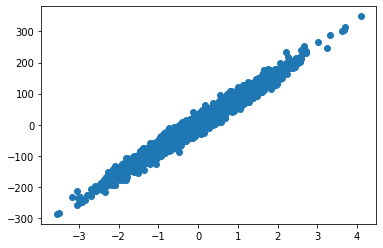

In [6]:
plt.scatter(x,y)

In [8]:
def hypothesis(x,theta):
    return theta[1]*x+theta[0]

In [10]:
def error(x,y,theta):
    err=0
    for i in range(0,x.shape[0]):
        err+=(y[i]-hypothesis(x[i],theta))**2
    return err

In [11]:
def gradient(x,y,theta):
    grad=np.zeros((2,))
    for i in range(0,x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0]+=hx-y[i]
        grad[1]+=(hx-y[i])*x[i]
    return grad

In [23]:
def gradientDescent(x,y,learningRate=0.0001):
    theta=np.array([-300.0,0.0])
    itr=500
    errorList=[]
    thetaList=[]
    for i in range(0,itr):
        err=error(x,y,theta)
        errorList.append(err)
        thetaList.append(theta)
        grad=gradient(x,y,theta)
        theta[0]-=learningRate*grad[0]
        theta[1]-=learningRate*grad[1]
    return theta,errorList,thetaList

In [24]:
opt_theta,errorList,thetaList=gradientDescent(x,y)

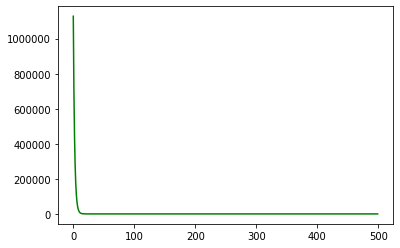

In [25]:
plt.plot(errorList,color='green')
plt.show()

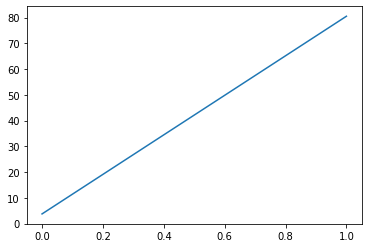

In [32]:
plt.plot(thetaList[1])
plt.show()

In [33]:
print(opt_theta)

[ 3.72798828 80.54363185]


In [38]:
x_test=np.linspace(-4,4,20)
x_test

array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ])

In [39]:
h=hypothesis(x_test,opt_theta)
h

array([-318.44653913, -284.53343099, -250.62032284, -216.70721469,
       -182.79410654, -148.88099839, -114.96789024,  -81.05478209,
        -47.14167394,  -13.22856579,   20.68454236,   54.59765051,
         88.51075866,  122.42386681,  156.33697496,  190.25008311,
        224.16319126,  258.0762994 ,  291.98940755,  325.9025157 ])

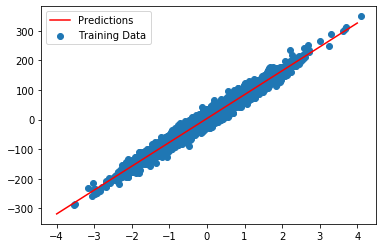

In [43]:
plt.scatter(x,y,label='Training Data')
plt.plot(x_test,h,color='red',label='Predictions')
plt.legend()
plt.show()